In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('liver_disease.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
df.info()
df.isna()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Disease                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Disease                       0
dtype: int64

1    416
0    167
Name: Disease, dtype: int64


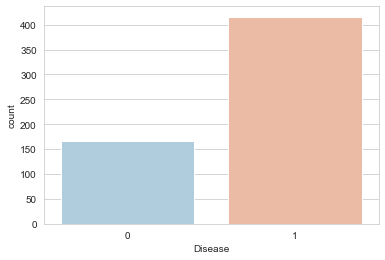

In [4]:
df['Disease']=df['Disease'].apply(lambda x: 0 if x==2 else 1)
print(df['Disease'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='Disease',data=df,palette='RdBu_r')

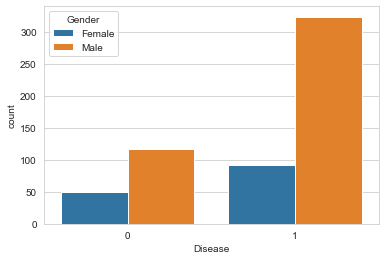

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Disease',hue='Gender',data=df)

In [6]:
df['Gender']=df['Gender'].apply(lambda x: 1 if x=='Female' else 0)

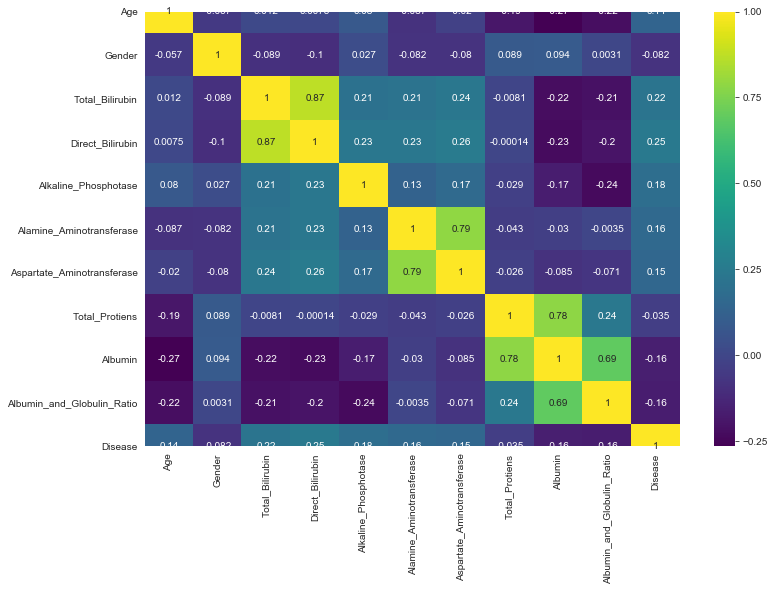

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [8]:
X=df.iloc[:, :-1]
y=df['Disease']

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
77    68       1              0.6               0.1                  1620   
581   31       0              1.3               0.5                   184   
210   28       0              0.8               0.3                   190   
192   60       0              2.3               0.6                   272   
449   48       1              0.9               0.2                   173   
..   ...     ...              ...               ...                   ...   
71    75       1              0.8               0.2                   188   
106   36       0              5.3               2.3                   145   
270   37       0              0.7               0.2                   235   
435   17       1              0.5               0.1                   206   
102   17       0              0.9               0.2                   224   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

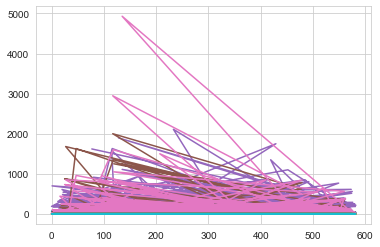

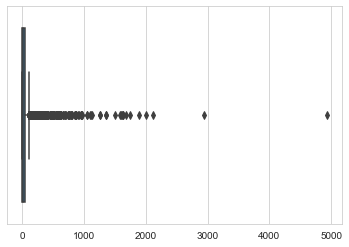

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train)
print(X_test)
X_train.describe().transpose()
plt.plot(X_train)
plt.show()
plt.figure(figsize=(6, 4))
sns.boxplot(X_train)

In [12]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# print(X_train)
# print(X_test)
# print(X_train.shape)
# plt.plot(X_train)
# plt.show()
# plt.figure(figsize=(6, 4))
# sns.boxplot(X_train)

# mean = np.mean(X_train)
# median = np.median(X_train)
  
# # measures of dispersion
# min = np.amin(X_train)
# max = np.amax(X_train)
# range = np.ptp(X_train)
# varience = np.var(X_train)
# sd = np.std(X_train)
  
# print("Descriptive analysis")
# print("Array =", X_train)
# print("Measures of Central Tendency")
# print("Mean =", mean)
# print("Median =", median)
# print("Measures of Dispersion")
# print("Minimum =", min)
# print("Maximum =", max)
# print("Range =", range)
# print("Varience =", varience)
# print("Standard Deviation =", sd)

                            importance
feature                               
Alkaline_Phosphotase             0.143
Age                              0.137
Aspartate_Aminotransferase       0.131
Alamine_Aminotransferase         0.130
Total_Bilirubin                  0.103
Total_Protiens                   0.095
Albumin                          0.091
Direct_Bilirubin                 0.077
Albumin_and_Globulin_Ratio       0.074
Gender                           0.019


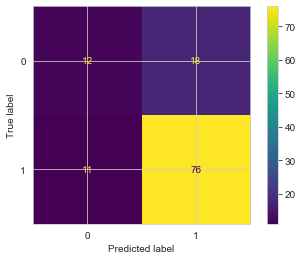

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
rf= RandomForestClassifier(n_estimators=50,random_state=42)
clf = rf.fit(X_train, y_train)
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

print(importances.head(15))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
y_pred_rf=rf.predict(X_test)
score=accuracy_score(y_test, y_pred_rf)
print (classification_report(y_pred_rf, y_test))
print(rf.score(X_test,y_test))
print(mean_absolute_error(y_test, y_pred_rf))
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_pred_rf))  # Test MSE

              precision    recall  f1-score   support

           0       0.40      0.52      0.45        23
           1       0.87      0.81      0.84        94

    accuracy                           0.75       117
   macro avg       0.64      0.67      0.65       117
weighted avg       0.78      0.75      0.76       117

0.7521367521367521
0.24786324786324787
Mean squared error: 0.248


In [18]:
# from sklearn import linear_model

# regression = linear_model.LinearRegression()
# regression.fit(X_train, y_train)

# y_pred = regression.predict(X_test) 
# print(regression.score(X_test,y_test)) # R-squared 
# print(mean_absolute_error(y_test, y_pred))
# print("Mean squared error: %.3f"
#       % mean_squared_error(y_test, y_pred))  # Test MSE

0.10319837297204393
0.37101897032124664
Mean squared error: 0.171


In [17]:
# from sklearn.ensemble import BaggingClassifier
# bagg = BaggingClassifier(n_estimators=100, random_state=42)
# clf = bagg.fit(X_train, y_train)
# y_pred_bagg=bagg.predict(X_test)
# score=accuracy_score(y_test, y_pred_bagg)
# print (score)
# print (classification_report(y_pred_bagg, y_test))

# print(mean_absolute_error(y_test, y_pred))
# print("Mean squared error: %.3f"
#       % mean_squared_error(y_test, y_pred_bagg))  # Test MSE

In [153]:
import pickle
pickle_out=open("liverdisease.pkl", "wb")
pickle.dump(rf, pickle_out)
pickle_out.close()